In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('sales.csv')

In [102]:
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [103]:
# Drop unnamed, date and store ID

In [104]:
df.drop(columns=['Unnamed: 0','date', 'store_ID'], inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   day_of_week          640840 non-null  int64 
 1   nb_customers_on_day  640840 non-null  int64 
 2   open                 640840 non-null  int64 
 3   promotion            640840 non-null  int64 
 4   state_holiday        640840 non-null  object
 5   school_holiday       640840 non-null  int64 
 6   sales                640840 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 34.2+ MB


In [106]:
# Transform categorical into numerical values

In [107]:
df

,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,4,517,1,0,0,0,4422
1,6,694,1,0,0,0,8297
2,4,970,1,1,0,0,9729
3,2,473,1,1,0,0,6513
4,4,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...
640835,6,483,1,0,0,0,4553
640836,1,987,1,1,0,0,12307
640837,1,925,1,0,0,0,6800
640838,4,725,1,0,0,0,5344


In [108]:
df['nb_customers_on_day'].mean()

633.3985768678609

<Axes: xlabel='nb_customers_on_day', ylabel='Count'>

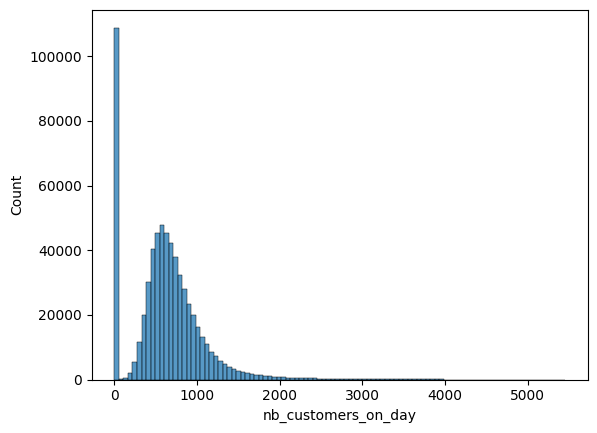

In [109]:
sns.histplot(df['nb_customers_on_day'],  bins=100)

<Axes: xlabel='nb_customers_on_day', ylabel='sales'>

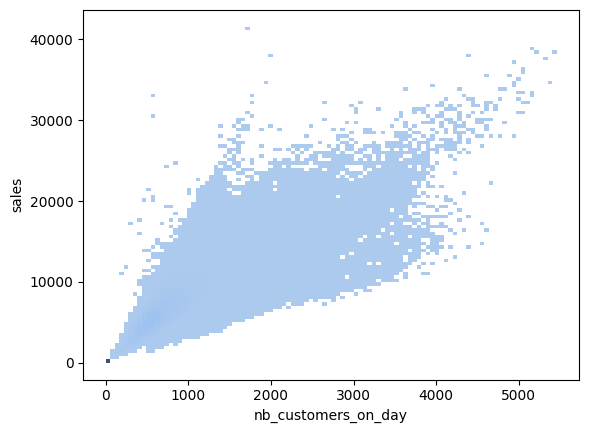

In [110]:
sns.histplot(x =df['nb_customers_on_day'],y=df['sales'],  bins=100)


<Axes: xlabel='promotion', ylabel='sales'>

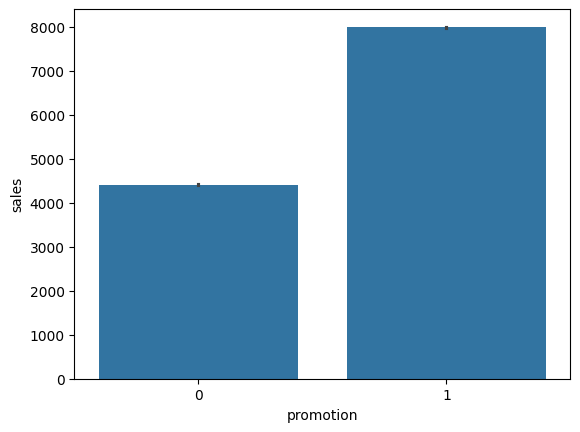

In [111]:
sns.barplot(x =df['promotion'],y=df['sales'])

<Axes: xlabel='day_of_week', ylabel='sales'>

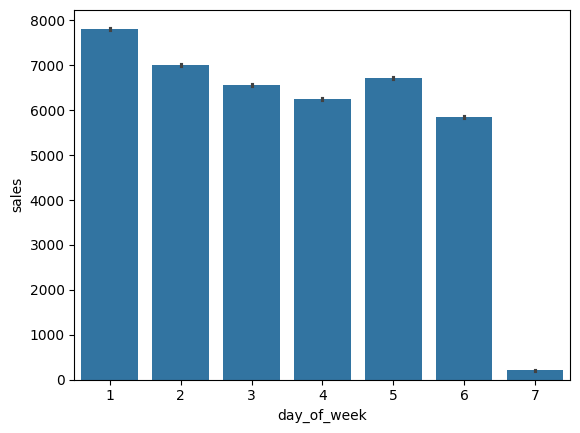

In [112]:
sns.barplot(x =df['day_of_week'],y=df['sales'])

In [113]:
# Round to the nearest 100
df['nb_customers_on_day'] = df['nb_customers_on_day'].round(-2)

In [114]:
df['nb_customers_on_day'].value_counts().head()

nb_customers_on_day
0      108858
600     86654
500     79041
700     73995
800     59202
Name: count, dtype: int64

In [115]:
df['day_of_week'].value_counts()

day_of_week
5    92138
4    91972
2    91686
3    91651
6    91347
7    91075
1    90971
Name: count, dtype: int64

In [116]:
df[['day_of_week','sales']].groupby(by= ['day_of_week']).mean()

,sales
day_of_week,
1,7812.766948
2,7004.780054
3,6555.350536
4,6255.380268
5,6726.462697
6,5850.032820
7,210.680439


In [117]:
df['school_holiday'].value_counts()

school_holiday
0    526468
1    114372
Name: count, dtype: int64

In [118]:
df['promotion'].value_counts()

promotion
0    396220
1    244620
Name: count, dtype: int64

In [119]:
df['open'].value_counts()

open
1    532016
0    108824
Name: count, dtype: int64

In [120]:
df['state_holiday'].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [121]:
df[['state_holiday','sales' ]].groupby(by= ['state_holiday']).mean()

,sales
state_holiday,
0,5952.206403
a,282.368167
b,252.936877
c,178.606707


In [122]:

# Define mapping dictionary for replacement
mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}

# Replace values for state holidays
df.replace(mapping, inplace=True)

In [123]:
df

,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,4,500,1,0,0,0,4422
1,6,700,1,0,0,0,8297
2,4,1000,1,1,0,0,9729
3,2,500,1,1,0,0,6513
4,4,1100,1,1,0,0,10882
...,...,...,...,...,...,...,...
640835,6,500,1,0,0,0,4553
640836,1,1000,1,1,0,0,12307
640837,1,900,1,0,0,0,6800
640838,4,700,1,0,0,0,5344


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   day_of_week          640840 non-null  int64
 1   nb_customers_on_day  640840 non-null  int64
 2   open                 640840 non-null  int64
 3   promotion            640840 non-null  int64
 4   state_holiday        640840 non-null  int64
 5   school_holiday       640840 non-null  int64
 6   sales                640840 non-null  int64
dtypes: int64(7)
memory usage: 34.2 MB


In [125]:
# Lets perform an XGBoost to understand feature importance thanks to the beauty of trees
X = df.drop(columns='sales')
y = df['sales']

# Get the Regressor model and fit it
xgb = XGBRegressor()
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

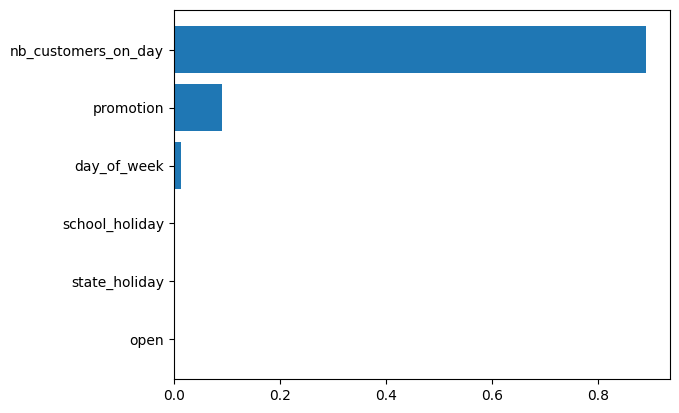

In [126]:
# Print the plot
sort_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

In [127]:
# NOTE
# Keep in mind the most influencial columns are : n of customer, promotiona nd day of week
    # get rid of school holiday, state holiday and open and see the performance after

In [128]:
# NOTE
    # Make tree based model only on customers per day to predict sales 
    # then add promotions then add days of the week and run the tree again

In [129]:
# Lets look at correlations
def print_corr(df):
    '''
        Function that return a correlation matrix in a heatmap plot.
        
        Parameters : Pandas DataFrame
        
        Return: seaborn heatmap
    '''
    correlation = df.corr()

    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(10, 10))

    cmap = sns.diverging_palette(180, 20, as_cmap=True)
    sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    return plt.show()

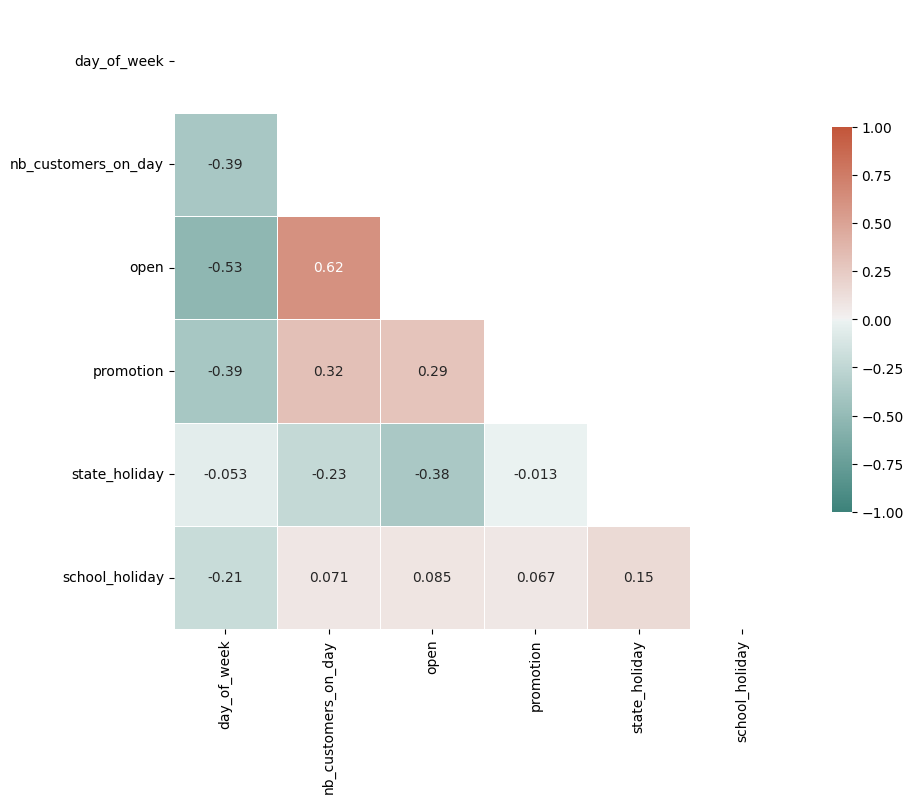

In [130]:
print_corr(X)

### LETS BUILD A MODEL NOW

In [131]:
## Random Forest
df.head(5)

,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,4,500,1,0,0,0,4422
1,6,700,1,0,0,0,8297
2,4,1000,1,1,0,0,9729
3,2,500,1,1,0,0,6513
4,4,1100,1,1,0,0,10882


In [132]:
from sklearn import tree
import numpy as np

In [134]:
y = df["sales"]
X = df[['day_of_week', 'nb_customers_on_day', 'open', 'promotion','state_holiday', 'school_holiday']]


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 1892955.9690252196
Mean Absolute Error (MAE): 904.9510608991908
R-squared (R2): 0.8719388891860164


In [137]:
new = pd.read_csv('sales.csv')


In [138]:
new = new.drop(columns=['Unnamed: 0', "date"])

In [139]:
# Define mapping dictionary for replacement
mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}
# Replace values for state holidays
new.replace(mapping, inplace=True)

In [140]:
new.columns

Index(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [141]:
ystore = new["sales"]
Xstore = new[['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday']]

In [142]:
# Split data into training and testing sets
X_trains, X_tests, y_trains, y_tests = train_test_split(Xstore, ystore, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_trains, y_trains)

# Predict on the test set
y_preds = rf.predict(X_tests)

# Evaluate the model
mse = mean_squared_error(y_tests, y_preds)
mae = mean_absolute_error(y_tests, y_preds)
r2 = r2_score(y_tests, y_preds)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 486693.6167898397
Mean Absolute Error (MAE): 402.50465418318265
R-squared (R2): 0.9670744981858836


In [180]:
sales2 = pd.read_csv('sales.csv')

In [181]:
sales2.head()
# ddaate as y/month/day

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [182]:
#sales2 = pd.read_csv('sales.csv')
sales2 = sales2.drop(columns=['Unnamed: 0'])
sales2['date'] = pd.to_datetime(sales2['date'])
sales2['month'] = sales2['date'].dt.month
sales2 = sales2.drop(columns=['date'])

# Define mapping dictionary for replacement
mapping = {'a': 1, 'b': 1, 'c': 1}

# Replace values for state holidays
sales2.replace(mapping, inplace=True)



In [183]:
sales2.columns

Index(['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday', 'sales', 'month'],
      dtype='object')

In [184]:
sales2.state_holiday.astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
640835    0
640836    0
640837    0
640838    0
640839    0
Name: state_holiday, Length: 640840, dtype: int64

In [185]:
Xm = sales2[['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion',
       'state_holiday', 'school_holiday','month']]
ym = sales2["sales"]

In [186]:
# Split data into training and testing sets
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rfm = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rfm.fit(X_trainm, y_trainm)

# Predict on the test set
y_predm = rfm.predict(X_testm)

# Evaluate the model
mse = mean_squared_error(y_testm, y_predm)
mae = mean_absolute_error(y_testm, y_predm)
r2 = r2_score(y_testm, y_predm)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 587383.2253363653
Mean Absolute Error (MAE): 449.3960512253324
R-squared (R2): 0.9602627057676304


In [157]:
## Loadd real Data
real = pd.read_csv('REAL_DATA.csv')


In [158]:
real.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [159]:
real.columns

Index(['index', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday'],
      dtype='object')

In [173]:
#real["date"] = pd.to_datetime(real['date'])
## dday/month/year
# Convert 'date' column to datetime format
real['date'] = pd.to_datetime(real['date'], format='%d/%m/%Y')

In [175]:
real.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,415,7,2015-03-01,0,0,0,0,0
1,27,7,2013-12-29,0,0,0,0,0
2,404,3,2014-03-19,657,1,1,0,0
3,683,2,2013-01-29,862,1,0,0,0
4,920,3,2014-03-19,591,1,1,0,0


In [176]:
### recombert the file as my training
#real = real.drop(columns=['index'])
real['date'] = pd.to_datetime(real['date'])

real['month'] = real['date'].dt.month
real = real.drop(columns=['date'])
# Define mapping dictionary for replacement
mapping = {'a': 1, 'b': 1, 'c': 1}

# Replace values for state holidays
real.replace(mapping, inplace=True)

In [177]:
real.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,month
0,415,7,0,0,0,0,0,3
1,27,7,0,0,0,0,0,12
2,404,3,657,1,1,0,0,3
3,683,2,862,1,0,0,0,1
4,920,3,591,1,1,0,0,3


In [178]:
sales2.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,month
0,366,4,517,1,0,0,0,4422,4
1,394,6,694,1,0,0,0,8297,4
2,807,4,970,1,1,0,0,9729,8
3,802,2,473,1,1,0,0,6513,5
4,726,4,1068,1,1,0,0,10882,10


In [179]:
## now our real data is equal to our X for the model
X_real = real

# Predict on the test set
y_pred_real = rfm.predict(X_testm)

In [ ]:
#### Retraining the model with upddate dddata
# rfm.fit(X_real, y_)
## evaluate the retarined model
predictions